<a href="https://colab.research.google.com/github/mickee00000/Research_Internship/blob/main/201951090_Summer_Research_Internship_Project_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2

In [3]:
import pathlib
import os
import sys

In [4]:
import requests
import IPython

In [5]:
url = 'https://raw.githubusercontent.com/mickee00000/Research_Internship/main/part1.jpeg'
r = requests.get(url, allow_redirects=True)
open('part1.jpeg', 'wb').write(r.content)

94205

In [6]:
hindi_data = tf.keras.utils.get_file('hindi_text', origin = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip', cache_dir='.', extract=True, archive_format='zip')
hindi_data

80429056/80417803 [==============================] - 2s 0us/step


'./datasets/hindi_text'

In [7]:
hindi_data_train = pathlib.Path(r'/content/datasets/DevanagariHandwrittenCharacterDataset/Train')
hindi_data_train

PosixPath('/content/datasets/DevanagariHandwrittenCharacterDataset/Train')

In [8]:
hindi_data_test = pathlib.Path(r'/content/datasets/DevanagariHandwrittenCharacterDataset/Test')
hindi_data_test

PosixPath('/content/datasets/DevanagariHandwrittenCharacterDataset/Test')

In [9]:
image_count = len(list(hindi_data_train.glob('*/*.png')))
image_count

78200

In [10]:
len(list(hindi_data_train.glob('character_3_ga/*')))

1700

In [11]:
hindi_letters_dict_train = {
    'sa': list(hindi_data_train.glob('character_32_patalosaw/*')),
    're': list(hindi_data_train.glob('character_27_ra/*')),
    'ga': list(hindi_data_train.glob('character_3_ga/*')),
    'ma': list(hindi_data_train.glob('character_25_ma/*')),
    'pa': list(hindi_data_train.glob('character_21_pa/*')),
    'dha': list(hindi_data_train.glob('character_19_dha/*')),
    'ni': list(hindi_data_train.glob('character_20_na/*')),
    #'zero': list(hindi_data_train.glob('digit_0/*')),
    #'one': list(hindi_data_train.glob('digit_1/*')),
    #'two': list(hindi_data_train.glob('digit_2/*')),
    #'three': list(hindi_data_train.glob('digit_3/*')),
    #'four': list(hindi_data_train.glob('digit_4/*')),
    #'five': list(hindi_data_train.glob('digit_5/*')),
    #'six': list(hindi_data_train.glob('digit_6/*')),
    #'seven': list(hindi_data_train.glob('digit_7/*')),
    #'eight': list(hindi_data_train.glob('digit_8/*')),
    #'nine': list(hindi_data_train.glob('digit_9/*')),
}

In [12]:
hindi_letters_dict_test = {
    'sa': list(hindi_data_test.glob('character_32_patalosaw/*')),
    're': list(hindi_data_test.glob('character_27_ra/*')),
    'ga': list(hindi_data_test.glob('character_3_ga/*')),
    'ma': list(hindi_data_test.glob('character_25_ma/*')),
    'pa': list(hindi_data_test.glob('character_21_pa/*')),
    'dha': list(hindi_data_test.glob('character_19_dha/*')),
    'ni': list(hindi_data_test.glob('character_20_na/*')),
    #'zero': list(hindi_data_test.glob('digit_0/*')),
    #'one': list(hindi_data_test.glob('digit_1/*')),
    #'two': list(hindi_data_test.glob('digit_2/*')),
    #'three': list(hindi_data_test.glob('digit_3/*')),
    #'four': list(hindi_data_test.glob('digit_4/*')),
    #'five': list(hindi_data_test.glob('digit_5/*')),
    #'six': list(hindi_data_test.glob('digit_6/*')),
    #'seven': list(hindi_data_test.glob('digit_7/*')),
    #'eight': list(hindi_data_test.glob('digit_8/*')),
    #'nine': list(hindi_data_test.glob('digit_9/*')),
}

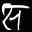

In [13]:
PIL.Image.open(hindi_letters_dict_train['sa'][0])

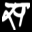

In [14]:
PIL.Image.open(hindi_letters_dict_train['sa'][5])

In [15]:
hindi_label_dict = {
    'sa': 0,
    're': 1,
    'ga': 2,
    'ma': 3,
    'pa': 4,
    'dha': 5,
    'ni': 6,
    #'zero': 7,
    #'one': 8,
    #'two': 9,
    #'three': 10,
    #'four': 11,
    #'five': 12,
    #'six': 13,
    #'seven': 14,
    #'eight': 15,
    #'nine': 16,
}

In [16]:
hindi_name_dict = {
     0: 'sa',
     1: 're',
     2: 'ga',
     3: 'ma',
     4: 'pa',
     5: 'dha',
     6: 'ni',
     #7: 'zero',
     #8: 'one',
     #9: 'two',
     #10: 'three',
     #11: 'four',
     #12: 'five',
     #13: 'six',
     #14: 'seven',
     #15: 'eight',
     #16: 'nine',
}

In [17]:
img = cv2.imread(str(hindi_letters_dict_train['re'][0]))


In [18]:
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [165, 165, 165],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [19]:
X_train = []
y_train = []

In [20]:
for key, value_list in hindi_letters_dict_train.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_train.append(img)
        y_train.append(hindi_label_dict[key])

In [21]:
X_test = []
y_test = []

In [22]:
for key, value_list in hindi_letters_dict_test.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_test.append(img)
        y_test.append(hindi_label_dict[key])

In [23]:
len(X_train)

11900

In [24]:
len(y_train)

11900

In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [26]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
X_train.shape

(11900, 32, 32, 3)

In [28]:
X_test.shape

(2100, 32, 32, 3)

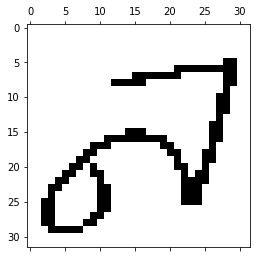

In [29]:
plt.matshow(X_train[11110])

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
hindi_name_dict[y_train[11110]]

'ni'

In [32]:
X_train_scaled.shape

(11900, 32, 32, 3)

In [33]:
#X_train_scaled_flat = np.reshape(#X_train_scaled, (28900, 32*32*3))

In [34]:
y_train[0]

0

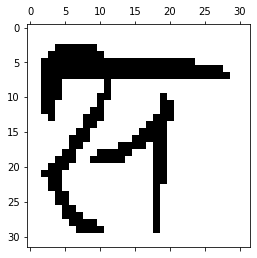

In [35]:
plt.matshow(X_train[0])

In [36]:
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(32,32,3,)),
        keras.layers.experimental.preprocessing.RandomRotation(0.2),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
      
    ]
)

In [37]:
model = keras.Sequential([
    data_augmentation,
    

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),
    keras.layers.Flatten(),


    keras.layers.Dense(128, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(64, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(7,activation = "softmax"),

])

In [38]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [39]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)      

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 80)

Epoch 1/80
372/372 [==============================] - 15s 7ms/step - loss: 1.0755 - accuracy: 0.6139
Epoch 2/80
372/372 [==============================] - 3s 7ms/step - loss: 0.5079 - accuracy: 0.8229
Epoch 3/80
372/372 [==============================] - 3s 7ms/step - loss: 0.3714 - accuracy: 0.8734
Epoch 4/80
372/372 [==============================] - 3s 7ms/step - loss: 0.2892 - accuracy: 0.9000
Epoch 5/80
372/372 [==============================] - 3s 7ms/step - loss: 0.2533 - accuracy: 0.9149
Epoch 6/80
372/372 [==============================] - 3s 7ms/step - loss: 0.2189 - accuracy: 0.9255
Epoch 7/80
372/372 [==============================] - 3s 7ms/step - loss: 0.2082 - accuracy: 0.9316
Epoch 8/80
372/372 [==============================] - 3s 7ms/step - loss: 0.1907 - accuracy: 0.9357
Epoch 9/80
372/372 [==============================] - 3s 7ms/step - loss: 0.1763 - accuracy: 0.9424
Epoch 10/80
372/372 [==============================] - 3s 7ms/step - loss: 0.1643 - accuracy: 0.947

In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
print(model.summary())

In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
url = 'https://raw.githubusercontent.com/mickee00000/Research_Internship/main/part1.jpeg'
r = requests.get(url, allow_redirects=True)
open('part1.jpeg', 'wb').write(r.content)

In [ ]:
notes = cv2.imread("part1.jpeg")
gray = cv2.cvtColor(notes, cv2.COLOR_BGR2GRAY)

In [ ]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [ ]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [ ]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

In [ ]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
print(len(contours))

In [ ]:
notes2 = notes.copy()

In [ ]:
new_contours = []

In [ ]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio_1 = h / w
    aspect_ratio_2 = w / h
    if aspect_ratio_1 < 3 and aspect_ratio_2 < 2 and w > 18 and h > 20:
        new_contours.append(cnt)

In [ ]:
passer = []

In [ ]:
num = len(new_contours) - 1
for cnt in new_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cropped = thresh1[y:y + h, x:x + w]
    cropped = cv2.cvtColor(cropped, cv2.IMREAD_GRAYSCALE)
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGRA2BGR)
    cropped = cv2.resize(cropped,(32,32))
    _, cropped = cv2.threshold(cropped, 127,255, cv2.THRESH_BINARY)
    cropped = cv2.bitwise_not(cropped)

    passer.append(cropped)
    cv2.rectangle(notes, (x-5, y-5), (x + w+5, y + h+5), (0, 0, 255), 2)
    cv2.putText(notes, "{}".format(num + 1), (x + 40, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255), 2)
    num-=1

In [ ]:
passer.reverse()

In [ ]:
np.array(passer).shape

j = 1 
path= '/tmp/'
for i in passer:
  cv2.imwrite(str(path)+str(j)+'.jpeg', i)
  j+=1


In [ ]:
cv2.imwrite('bounded.jpeg', notes)

In [ ]:
plt.imshow(notes)
plt.show()

In [ ]:
plt.imshow(passer[0])

In [ ]:
plt.imshow(passer[1])

In [ ]:
plt.imshow(passer[2])

In [ ]:
plt.imshow(passer[3])

In [ ]:
plt.imshow(passer[4])

In [ ]:
passer = np.array(passer)

passer = passer / 255

In [ ]:
result = model.predict(passer)

In [ ]:
label_result = [np.argmax(i) for i in result]
label_result

In [ ]:
notes_array = [hindi_name_dict[i] for i in label_result]
notes_array

In [ ]:
music_translate = {
    'sa': 'C3',
    're': 'D3',
    'ga': 'E3',
    'ma': 'F3',
    'pa': 'G3',
    'dha': 'A3',
    'ni': 'B3',
}

In [ ]:
western_notes = [music_translate[i] for i in notes_array]
western_notes

In [ ]:
pitchnames = sorted(set(western_notes))

pitchnames

In [ ]:
from music21 import converter, instrument, note, chord, stream

In [ ]:
offset = 0
output_notes = []

for value in western_notes:
    if('.' in value) or value.isdigit():
        chord_notes = value.split('.')
        notes = []
        for current_note in chord_notes:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.offset = offset
        output_notes.append(new_chord)
    else:
        new_note = note.Note(value)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)
    offset += 0.5

In [ ]:
output_notes

In [ ]:
output_notes[0]

In [ ]:
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp='test_output.mid')

In [ ]:
IPython.display.Audio('test_output.wav')